 # Lab03-决策树-II 和 Lab04 KNN近邻分类算法

根据提供的band.data数据和描述文件，用算法实现预测。

### 1、导入所需的库
### 2、获得数据
### 3、数据准备，初次清洗数据
### 4、分析、识别模式，探寻数据
### 5、再次清洗数据
### 6、建模、预测和评价


## 1、导入所需的库
需要数据清理、分析、训练机器学习模型、可视化和评价等库。

In [1]:
import sys
sys.path
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [3]:
# data analysis and preparing
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics, tree

## 2、获得数据
数据文件，无数据的项目是用？填充的


In [4]:
missing_values = ["?","nan"]
names=['timestamp','cylinder number','customer','job number','grain screened','ink color','proof on ctd ink',
      'blade mfg','cylinder division','paper type','ink type','direct steam','solvent type','type on cylinder',
      'press type','press','unit number','cylinder size','paper mill location','plating tank','proof cut',
      'viscosity','caliper','ink temperature','humifity','roughness','blade pressure','varnish pct','press speed',
      'ink pct','solvent pct','ESA Voltage','ESA Amperage','wax','hardener','roller durometer','current density',
      'anode space ratio','chrome content','band type']

train_df = pd.read_csv("bands.data",names=names,na_values=missing_values,header=None)


In [5]:
print(train_df.columns.values.tolist())
print('#'*60)
train_df.info()

['timestamp', 'cylinder number', 'customer', 'job number', 'grain screened', 'ink color', 'proof on ctd ink', 'blade mfg', 'cylinder division', 'paper type', 'ink type', 'direct steam', 'solvent type', 'type on cylinder', 'press type', 'press', 'unit number', 'cylinder size', 'paper mill location', 'plating tank', 'proof cut', 'viscosity', 'caliper', 'ink temperature', 'humifity', 'roughness', 'blade pressure', 'varnish pct', 'press speed', 'ink pct', 'solvent pct', 'ESA Voltage', 'ESA Amperage', 'wax', 'hardener', 'roller durometer', 'current density', 'anode space ratio', 'chrome content', 'band type']
############################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            541 non-null    object 
 1   cylinder number      540 non-null    object 
 2   customer         

#### band type作为目标列，有2行空值，空值行首先删除，以免影响后面的统计分析。

In [6]:
for index in range(train_df.shape[0]):
    try:
        if np.isnan(train_df['band type'][index]):
            train_df=train_df.drop([index])
    except:
        pass
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            539 non-null    object 
 1   cylinder number      539 non-null    object 
 2   customer             539 non-null    object 
 3   job number           539 non-null    float64
 4   grain screened       491 non-null    object 
 5   ink color            539 non-null    object 
 6   proof on ctd ink     483 non-null    object 
 7   blade mfg            480 non-null    object 
 8   cylinder division    539 non-null    object 
 9   paper type           539 non-null    object 
 10  ink type             539 non-null    object 
 11  direct steam         515 non-null    object 
 12  solvent type         485 non-null    object 
 13  type on cylinder     521 non-null    object 
 14  press type           539 non-null    object 
 15  press                539 non-null    flo

根据实际特征的数据类型，修改部分匹配不一致的数据类型。

In [7]:
train_df["job number"]=train_df["job number"].astype(np.object)
train_df["press"]=train_df["press"].astype(np.object)
train_df["unit number"]=train_df["unit number"].astype(np.object)
train_df["plating tank"]=train_df["plating tank"].astype(np.object)

train_df["caliper"]=train_df["caliper"].astype(np.float64)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            539 non-null    object 
 1   cylinder number      539 non-null    object 
 2   customer             539 non-null    object 
 3   job number           539 non-null    object 
 4   grain screened       491 non-null    object 
 5   ink color            539 non-null    object 
 6   proof on ctd ink     483 non-null    object 
 7   blade mfg            480 non-null    object 
 8   cylinder division    539 non-null    object 
 9   paper type           539 non-null    object 
 10  ink type             539 non-null    object 
 11  direct steam         515 non-null    object 
 12  solvent type         485 non-null    object 
 13  type on cylinder     521 non-null    object 
 14  press type           539 non-null    object 
 15  press                539 non-null    obj

In [8]:
train_df

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0.0,0.0,2.5,0.7,34.0,40.0,105.00,100.0,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0.0,0.0,2.8,0.9,40.0,40.0,103.87,100.0,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5.0,0.0,2.3,0.6,35.0,40.0,106.67,100.0,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,19941005,aa66,kmart,85813,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,1.0,1.0,NaN,40.0,112.50,100.0,band
537,19941009,j44,best,38064,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,0.0,0.0,NaN,40.0,110.00,100.0,band
538,19941009,aa58,kmart,85814,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,2.7,2.8,NaN,40.0,108.00,100.0,band
539,19941010,aa70,kmart,85814,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,1.5,2.3,NaN,40.0,108.00,100.0,band


## 3、数据准备、数据初次清理



#### 把文件中的字符串都转换成小写。

In [9]:
# 把文件中 str 类型的值全部转换成小写
# temp = 'aa22'
feature_list = train_df.columns.tolist()
for index in train_df.index:
    for feature in feature_list:
        # 字符串类型，更改成小写
        # if type(train_df.loc[index, feature]) == type(temp):
            # train_df.loc[index, feature] = train_df.loc[index, feature].lower()
        #if train_df.loc[index, feature] == '?':
            #train_df.loc[index, feature] = np.nan
        
        # 字符串类型，更改成小写
        try:
            if train_df[feature].dtype == "object":
                train_df.loc[index, feature] = train_df.loc[index, feature].lower()
        except:
            pass
        #if train_df.loc[index, feature] == '?':
            #train_df.loc[index, feature] = np.nan

In [10]:
train_df.head()

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910108,x126,tvguide,25503,yes,key,yes,benton,gallatin,uncoated,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,band
1,19910109,x266,tvguide,25503,yes,key,yes,benton,gallatin,uncoated,...,38.5,0.0,0.0,2.5,0.7,34.0,40.0,105.00,100.0,noband
2,19910104,b7,modmat,47201,yes,key,yes,benton,gallatin,uncoated,...,39.8,0.0,0.0,2.8,0.9,40.0,40.0,103.87,100.0,noband
3,19910104,t133,massey,39039,yes,key,yes,benton,gallatin,uncoated,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,noband
4,19910111,j34,kmart,37351,no,key,yes,benton,gallatin,uncoated,...,42.5,5.0,0.0,2.3,0.6,35.0,40.0,106.67,100.0,noband


### 分类特征的分析


In [11]:
print(train_df.describe(include=['O']))

       timestamp cylinder number customer  job number grain screened  \
count        539             539      539       539.0            491   
unique       295             429       71       261.0              2   
top     19900710            x129    kmart     47103.0             no   
freq           9               5       67        12.0            281   

       ink color proof on ctd ink blade mfg cylinder division paper type  ...  \
count        539              483       480               539        539  ...   
unique         1                2         2                 1          3  ...   
top          key              yes    benton          gallatin   uncoated  ...   
freq         539              461       479               539        293  ...   

       direct steam solvent type type on cylinder press type  press  \
count           515          485              521        539  539.0   
unique            2            3                2          4    8.0   
top              no 


539条记录，一共有295天的唯一值的记录，cylinder number 429个，共71个客户，工作单的唯一值是261个，相当于295天做了261个工作单。这几个特征因为取值范围过大，同时时间戳、cylinder编号、客户名称、工作单号属于相对随机的数据，对于实际预测认为无关，可考虑删除。
其余值的唯一值数量都在1个到8个。其中两个特征只有1个值，ink color、cylinder division，且没有空值，所以对预测无用。
- 00 timestamp，可删
- 01 cylinder number，可删
- 02 customer，可删
- 03 job number，可删
- 05 ink color，只有一个取值，删
- 07 blade mfg，有两个取值，但是其中一个值是479个，而另外一个值只有1个样本，没有代表意义，删
- 08 cylinder division，只有一个取值，删
- 11 direct steam,只有2个样本取值是yes，其余513个是no，没有代表意义，删


In [12]:
train_df.drop(["timestamp","cylinder number", "customer","job number","ink color",
               "blade mfg","cylinder division","direct steam"], axis=1, inplace=True)

train_df.describe(include=['O'])

,grain screened,proof on ctd ink,paper type,ink type,solvent type,type on cylinder,press type,press,unit number,cylinder size,paper mill location,plating tank,band type
count,491,483,539,539,485,521,539,539.0,539.0,536,384,521.0,539
unique,2,2,3,3,3,2,4,8.0,7.0,3,5,2.0,2
top,no,yes,uncoated,coated,line,yes,motter94,816.0,2.0,tabloid,northus,1910.0,noband
freq,281,461,293,291,468,385,237,103.0,246.0,298,189,331.0,312


下面查看一下数值型特征的数据分析表：

In [13]:
print(train_df.describe(percentiles=[.02, .1, .3,.4, .7, .9, .95]))

        proof cut   viscosity     caliper  ink temperature    humifity  \
count  485.000000  534.000000  512.000000       537.000000  538.000000   
mean    45.036082   50.949438    0.275857        15.359795   78.539033   
std      9.044097    8.058840    0.069474         1.277993    7.734621   
min     25.000000   35.000000    0.133000        11.200000   57.000000   
2%      30.000000   38.000000    0.200000        13.000000   64.000000   
10%     35.000000   41.000000    0.200000        14.000000   70.000000   
30%     40.000000   45.000000    0.233000        14.900000   75.000000   
40%     40.000000   48.000000    0.233000        15.000000   76.000000   
50%     45.000000   50.000000    0.267000        15.200000   78.000000   
70%     50.000000   55.000000    0.300000        16.000000   81.000000   
90%     57.500000   62.000000    0.367000        16.800000   88.000000   
95%     60.000000   65.000000    0.400000        17.000000   93.000000   
max     72.500000   72.000000    0.533

对于 varnish pct  press speed ESA Voltage  ESA Amperage        wax    hardener 最小值是0，可以认为是空值
- ESA Amperage，电流值，90%以上是0或空值，电压，50%以上是空值
- ESA Voltage，电压，50%以上是空值


In [14]:
# 把数值为0的值，替换成空值
feature_list = train_df.columns.tolist()
for index in train_df.index:
    for feature in feature_list:
        try:
            if train_df[feature].dtype == "float":
                if(train_df.loc[index, feature] == 0.0):
                    train_df.loc[index, feature] = np.nan
        except:
            pass

In [15]:
print(train_df.describe(percentiles=[]))

        proof cut   viscosity     caliper  ink temperature    humifity  \
count  485.000000  534.000000  512.000000       537.000000  538.000000   
mean    45.036082   50.949438    0.275857        15.359795   78.539033   
std      9.044097    8.058840    0.069474         1.277993    7.734621   
min     25.000000   35.000000    0.133000        11.200000   57.000000   
50%     45.000000   50.000000    0.267000        15.200000   78.000000   
max     72.500000   72.000000    0.533000        24.500000  105.000000   

        roughness  blade pressure  varnish pct  press speed     ink pct  \
count  509.000000      476.000000   271.000000   528.000000  484.000000   
mean     0.724333       30.907563    10.323985  1826.812500   55.638533   
std      0.193505        9.123473     6.061985   319.268104    5.561410   
min      0.056250       16.000000     0.500000   900.000000   41.000000   
50%      0.750000       30.000000     9.700000  1800.000000   56.750000   
max      1.250000       70.0000

In [16]:
# 删除空值过多的列
train_df.drop(["ESA Voltage","ESA Amperage", "chrome content"], axis=1, inplace=True)

## 相关性分析

### 最后一列band type为目标值。首先查看object类型的分类目标相关性

#### band type作为目标值，首先将其修改为1/0的数值，以便用于后面的关联分析。

In [17]:
num_encode = {
    'band type': {'noband':0, "band":1},
}
train_df.replace(num_encode,inplace=True)

In [18]:
columns_list = train_df.columns.tolist()
for feature in columns_list:
    if feature != 'proof cut':
        print(train_df[[feature, "band type"]].groupby([feature], as_index=False).mean().sort_values(by="band type", ascending=False))
    else:
        break

  grain screened  band type
1            yes   0.471429
0             no   0.298932
  proof on ctd ink  band type
1              yes   0.364425
0               no   0.227273
  paper type  band type
1      super   1.000000
2   uncoated   0.443686
0     coated   0.331839
   ink type  band type
1     cover   0.888889
2  uncoated   0.504348
0    coated   0.326460
  solvent type  band type
2        xylol   0.400000
0         line   0.356838
1       naptha   0.000000
  type on cylinder  band type
0               no   0.507353
1              yes   0.379221
  press type  band type
3  woodhoe70   0.545455
0   albert70   0.461538
2   motter94   0.362869
1   motter70   0.187500
   press  band type
2  815.0   0.651685
4  821.0   0.584416
3  816.0   0.524272
0  802.0   0.322581
6  827.0   0.305085
7  828.0   0.230769
5  824.0   0.225806
1  813.0   0.187500
   unit number  band type
4          7.0   0.611765
0          1.0   0.500000
1          2.0   0.439024
5          9.0   0.310811
3          6.0

proof on ctd ink不同值的相关度不高且基本一样，区分不开，同理，solvent type、cylinder size、plating tank，删除。

In [19]:
train_df.drop(["proof on ctd ink","solvent type","cylinder size",
               "plating tank"] ,axis=1, inplace=True)

train_df.describe(include=['O'])

,grain screened,paper type,ink type,type on cylinder,press type,press,unit number,paper mill location
count,491,539,539,521,539,539.0,539.0,384
unique,2,3,3,2,4,8.0,7.0,5
top,no,uncoated,coated,yes,motter94,816.0,2.0,northus
freq,281,293,291,385,237,103.0,246.0,189


### 常见的缺失值补全方法
常见的缺失值补全方法：均值插补、同类均值插补、建模预测、高维映射、多重插补、极大似然估计、压缩感知和矩阵补全。
如果某特征值的缺失过大，为避免因为插入值造成的噪音过大，对结果影响大，可以将该特征舍弃。

图形化展示时，如果有空值，不能正确显示图形。
先补全缺失值。上表目前只有两个特征有空值，采用众数进行填充。

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grain screened       491 non-null    object 
 1   paper type           539 non-null    object 
 2   ink type             539 non-null    object 
 3   type on cylinder     521 non-null    object 
 4   press type           539 non-null    object 
 5   press                539 non-null    object 
 6   unit number          539 non-null    object 
 7   paper mill location  384 non-null    object 
 8   proof cut            485 non-null    float64
 9   viscosity            534 non-null    float64
 10  caliper              512 non-null    float64
 11  ink temperature      537 non-null    float64
 12  humifity             538 non-null    float64
 13  roughness            509 non-null    float64
 14  blade pressure       476 non-null    float64
 15  varnish pct          271 non-null    flo

In [21]:
for item in train_df.columns.values.tolist():
    if train_df[item].dtype == object:
        train_df[item].fillna(train_df[item].mode(dropna=True)[0], inplace=True)


train_df["press"]=train_df["press"].astype(np.object)
train_df["unit number"]=train_df["unit number"].astype(np.object)


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grain screened       539 non-null    object 
 1   paper type           539 non-null    object 
 2   ink type             539 non-null    object 
 3   type on cylinder     539 non-null    object 
 4   press type           539 non-null    object 
 5   press                539 non-null    object 
 6   unit number          539 non-null    object 
 7   paper mill location  539 non-null    object 
 8   proof cut            485 non-null    float64
 9   viscosity            534 non-null    float64
 10  caliper              512 non-null    float64
 11  ink temperature      537 non-null    float64
 12  humifity             538 non-null    float64
 13  roughness            509 non-null    float64
 14  blade pressure       476 non-null    float64
 15  varnish pct          271 non-null    flo

In [23]:
train_df.describe(include=['O'])

,grain screened,paper type,ink type,type on cylinder,press type,press,unit number,paper mill location
count,539,539,539,539,539,539.0,539.0,539
unique,2,3,3,2,4,8.0,7.0,5
top,no,uncoated,coated,yes,motter94,816.0,2.0,northus
freq,329,293,291,403,237,103.0,246.0,344


<AxesSubplot:xlabel='grain screened', ylabel='band type'>

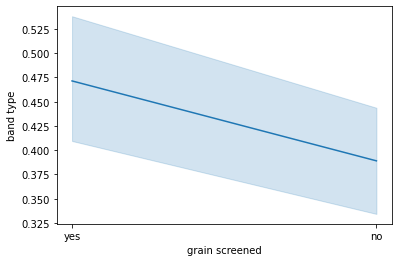

In [24]:
sns.lineplot(x='grain screened', y='band type', data=train_df)

<AxesSubplot:xlabel='paper type', ylabel='band type'>

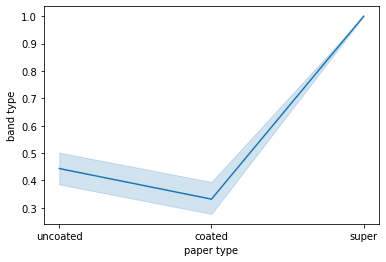

In [25]:
sns.lineplot(x='paper type', y='band type', data=train_df)

<AxesSubplot:xlabel='ink type', ylabel='band type'>

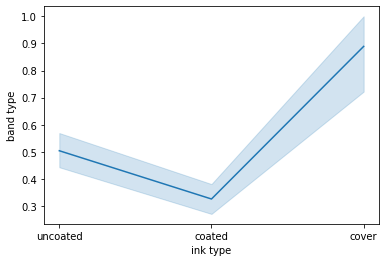

In [26]:
sns.lineplot(x='ink type', y='band type', data=train_df)


<AxesSubplot:xlabel='press type', ylabel='band type'>

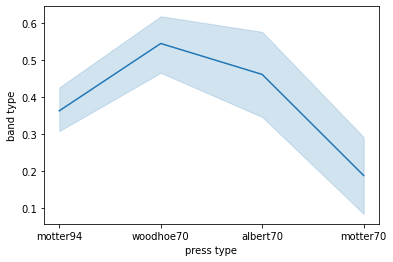

In [27]:
sns.lineplot(x='press type', y='band type', data=train_df)

<AxesSubplot:xlabel='press', ylabel='band type'>

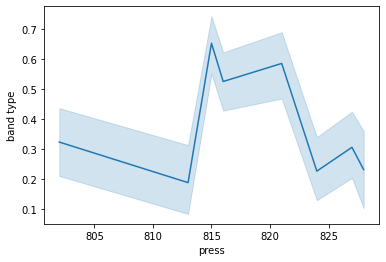

In [28]:
sns.lineplot(x='press', y='band type', data=train_df)

<AxesSubplot:xlabel='unit number', ylabel='band type'>

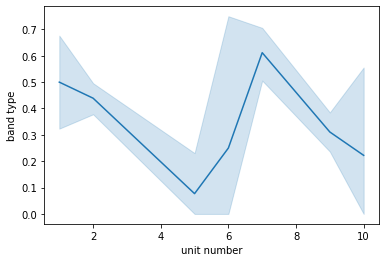

In [29]:
sns.lineplot(x='unit number', y='band type', data=train_df)


<AxesSubplot:xlabel='paper mill location', ylabel='band type'>

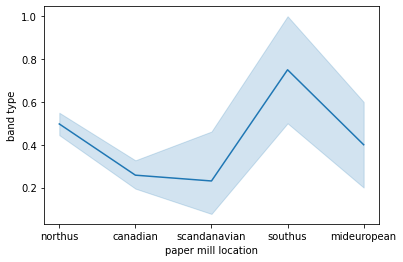

In [30]:
sns.lineplot(x='paper mill location', y='band type', data=train_df)

### 查看数值型特征与band type的相关性：

'proof cut','viscosity','caliper','ink temperature','humifity','roughness','blade pressure','varnish pct','press speed',
'ink pct','solvent pct','ESA Voltage','ESA Amperage','wax','hardener','roller durometer','current density',
'anode space ratio','chrome content','band type'

In [31]:
columns_list = train_df.columns.tolist()
index_proof = columns_list.index('proof cut')
# print(index_proof)
columns_list_num = columns_list[index_proof:]
# print(columns_list_num)

for feature in columns_list_num:
    if feature != 'band type':
        print(train_df[[feature, "band type"]].groupby([feature], as_index=False).mean().sort_values(by="band type", ascending=False))
   

    proof cut  band type
13       49.0   1.000000
15       52.0   0.750000
12       47.5   0.590909
17       55.0   0.548387
24       67.5   0.500000
22       62.5   0.500000
21       62.0   0.500000
14       50.0   0.473684
5        35.0   0.441176
9        42.5   0.416667
7        40.0   0.414414
8        42.0   0.333333
10       45.0   0.310345
23       65.0   0.307692
20       60.0   0.227273
4        32.5   0.222222
6        37.5   0.187500
2        30.0   0.176471
16       52.5   0.166667
25       70.0   0.000000
0        25.0   0.000000
19       57.5   0.000000
18       55.5   0.000000
1        27.5   0.000000
11       47.0   0.000000
3        32.0   0.000000
26       72.5   0.000000
    viscosity  band type
36       72.0   1.000000
31       66.0   1.000000
28       63.0   1.000000
1        36.0   1.000000
30       65.0   0.777778
17       52.0   0.750000
33       68.0   0.714286
14       49.0   0.615385
5        40.0   0.611111
4        39.0   0.571429
12       47.0   0.571429


图形化展示数值型特征与band type的相关性

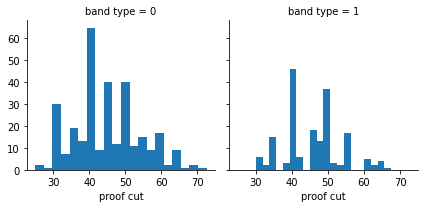

In [32]:
# proof cut
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'proof cut', bins=20)


<AxesSubplot:xlabel='proof cut', ylabel='band type'>

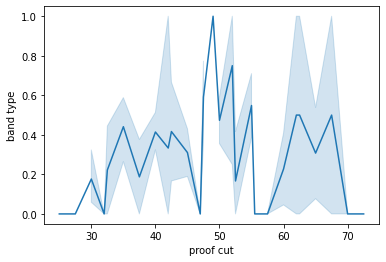

In [33]:
sns.lineplot(x='proof cut', y='band type', data=train_df)

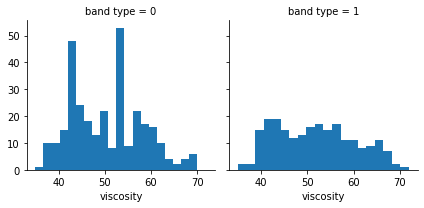

In [34]:
# viscosity
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'viscosity', bins=20)

<AxesSubplot:xlabel='viscosity', ylabel='band type'>

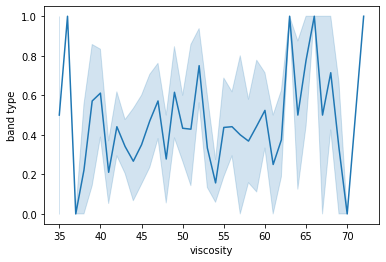

In [35]:
sns.lineplot(x='viscosity', y='band type', data=train_df)

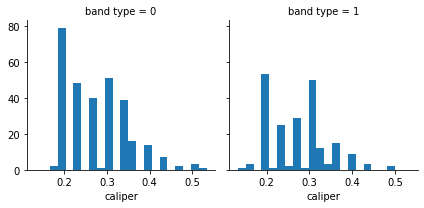

In [36]:
# caliper
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'caliper', bins=20)

<AxesSubplot:xlabel='caliper', ylabel='band type'>

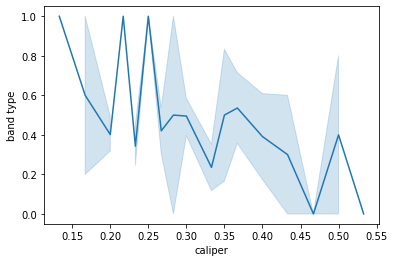

In [37]:
sns.lineplot(x='caliper', y='band type', data=train_df)

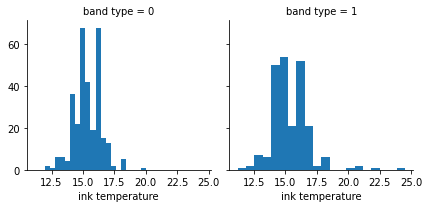

In [38]:
# ink temperature
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'ink temperature', bins=20)

<AxesSubplot:xlabel='ink temperature', ylabel='band type'>

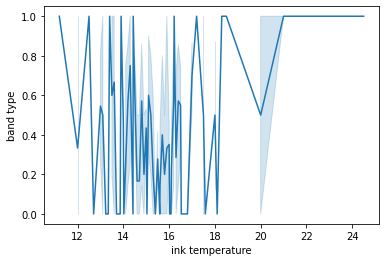

In [39]:
sns.lineplot(x='ink temperature', y='band type', data=train_df)

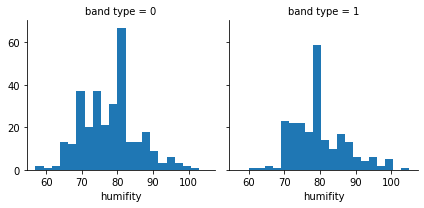

In [40]:
# humifity
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'humifity', bins=20)

<AxesSubplot:xlabel='humifity', ylabel='band type'>

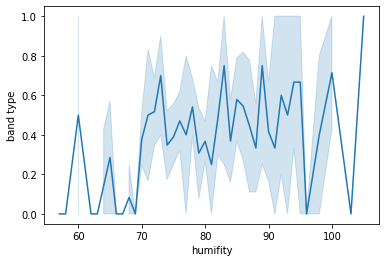

In [41]:
sns.lineplot(x='humifity', y='band type', data=train_df)

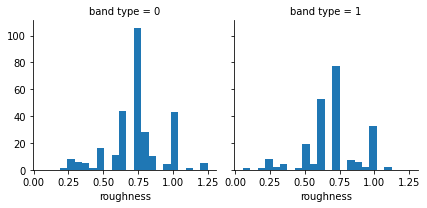

In [42]:
# roughness
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'roughness', bins=20)

<AxesSubplot:xlabel='roughness', ylabel='band type'>

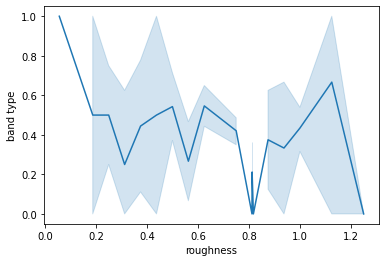

In [43]:
sns.lineplot(x='roughness', y='band type', data=train_df)

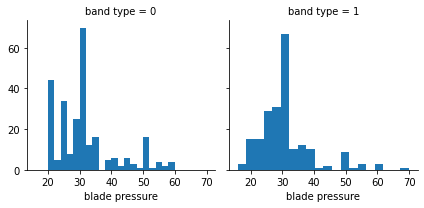

In [44]:
# blade pressure
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'blade pressure', bins=20)

<AxesSubplot:xlabel='blade pressure', ylabel='band type'>

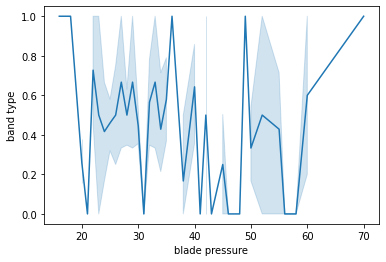

In [45]:
sns.lineplot(x='blade pressure', y='band type', data=train_df)

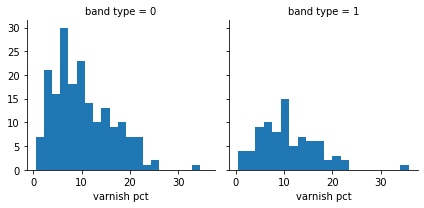

In [46]:
# varnish pct
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'varnish pct', bins=20)

<AxesSubplot:xlabel='varnish pct', ylabel='band type'>

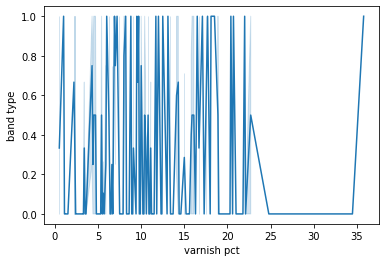

In [47]:
sns.lineplot(x='varnish pct', y='band type', data=train_df)

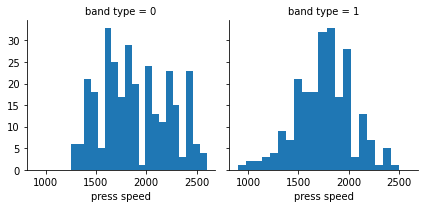

In [48]:
# press speed
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'press speed', bins=20)

<AxesSubplot:xlabel='press speed', ylabel='band type'>

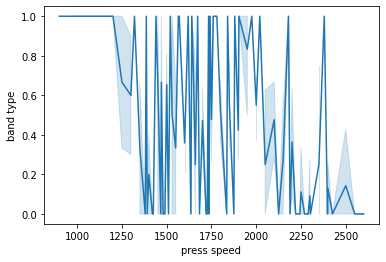

In [49]:
sns.lineplot(x='press speed', y='band type', data=train_df)

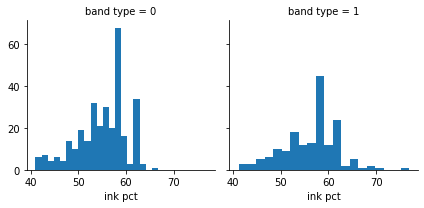

In [50]:
#  ink pct
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'ink pct', bins=20)

<AxesSubplot:xlabel='ink pct', ylabel='band type'>

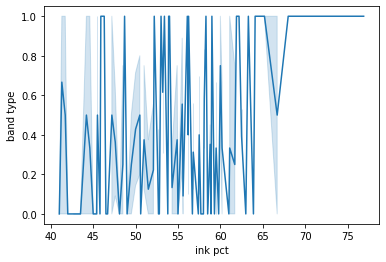

In [51]:
sns.lineplot(x='ink pct', y='band type', data=train_df)

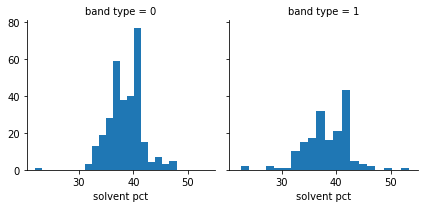

In [52]:
# solvent pct
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'solvent pct', bins=20)

<AxesSubplot:xlabel='solvent pct', ylabel='band type'>

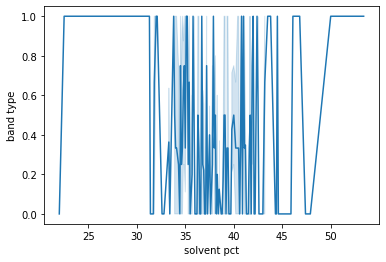

In [53]:
sns.lineplot(x='solvent pct', y='band type', data=train_df)

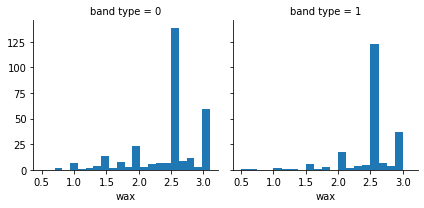

In [54]:
# wax
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'wax', bins=20)

<AxesSubplot:xlabel='wax', ylabel='band type'>

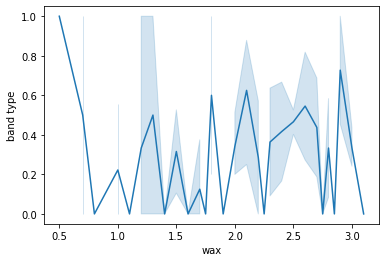

In [55]:
sns.lineplot(x='wax', y='band type', data=train_df)

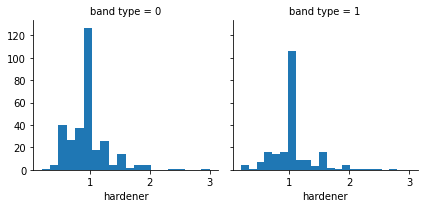

In [56]:
# hardener
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'hardener', bins=20)

<AxesSubplot:xlabel='hardener', ylabel='band type'>

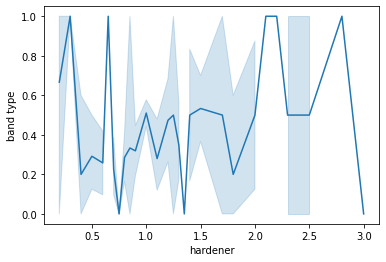

In [57]:
sns.lineplot(x='hardener', y='band type', data=train_df)

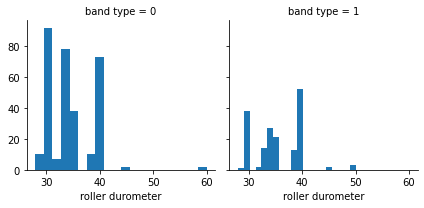

In [58]:
# roller durometer
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'roller durometer', bins=20)

<AxesSubplot:xlabel='roller durometer', ylabel='band type'>

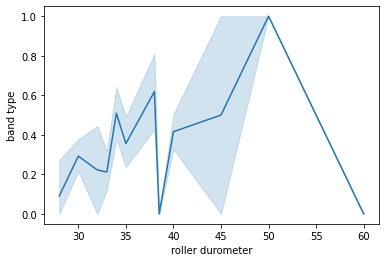

In [59]:
sns.lineplot(x='roller durometer', y='band type', data=train_df)

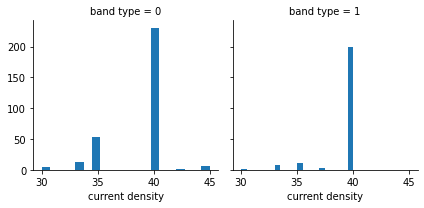

In [60]:
# current density
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'current density', bins=20)

<AxesSubplot:xlabel='current density', ylabel='band type'>

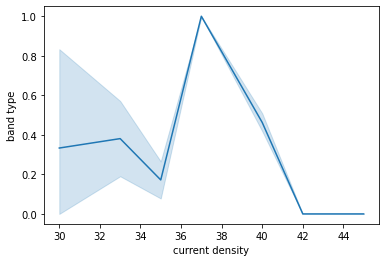

In [61]:
sns.lineplot(x='current density', y='band type', data=train_df)

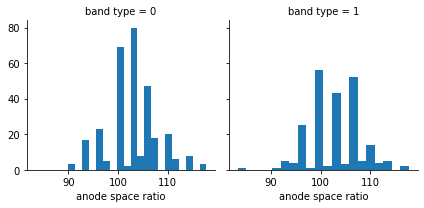

In [62]:
# anode space ratio
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'anode space ratio', bins=20)

<AxesSubplot:xlabel='anode space ratio', ylabel='band type'>

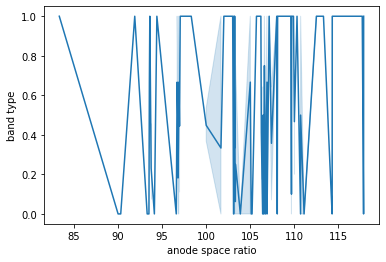

In [63]:
sns.lineplot(x='anode space ratio', y='band type', data=train_df)

# 接上次的决策树I，在决策树II中，再次分析数据，并考虑如何填充数据。

## Lab03决策树II的内容，相对Lab02增加了：

- 1、数据的填充方法：可以通过关联分析方法，更准确的填充空值
- 2、对于连续变量，可以用两种方法cut和qcut将连续值转换成离散值，以便用于决策树计算。
- 3、对于有些特征值，比如人员"Title"的长字符串，全部是唯一值，但是通过从中提取Mr、Mrs等关键称呼，取值只有5/6个，可以用于决策树计算。


单独看数值型的相关性表格：

In [64]:
train_df.corr()

,proof cut,viscosity,caliper,ink temperature,humifity,roughness,blade pressure,varnish pct,press speed,ink pct,solvent pct,wax,hardener,roller durometer,current density,anode space ratio,band type
proof cut,1.000000,0.025808,0.074770,-0.004770,0.007156,-0.073833,0.107645,0.288356,-0.243688,-0.339885,-0.177735,0.147146,-0.093792,0.355372,-0.061757,-0.036471,0.044879
viscosity,0.025808,1.000000,0.194467,-0.058695,0.261182,-0.003879,0.095932,-0.032659,0.022521,-0.039447,0.032268,0.073574,-0.072593,-0.047575,-0.083220,-0.052105,0.075143
caliper,0.074770,0.194467,1.000000,-0.072452,0.105705,0.065823,0.021284,0.134602,-0.084723,-0.063363,-0.064536,0.006243,-0.043287,0.083983,-0.156682,0.004180,-0.023028
ink temperature,-0.004770,-0.058695,-0.072452,1.000000,0.053867,-0.049685,-0.084040,-0.024172,0.057820,-0.020601,0.034265,-0.073310,0.009432,-0.052235,0.071109,0.030228,0.046579
humifity,0.007156,0.261182,0.105705,0.053867,1.000000,0.013011,0.010284,0.013608,0.068077,0.006953,0.078660,0.182502,-0.015866,0.000834,-0.131979,-0.083139,0.111358
roughness,-0.073833,-0.003879,0.065823,-0.049685,0.013011,1.000000,-0.041545,0.074480,0.007889,0.059800,-0.058879,-0.106115,0.063345,0.045689,-0.040800,-0.005801,-0.079181
blade pressure,0.107645,0.095932,0.021284,-0.084040,0.010284,-0.041545,1.000000,-0.006805,-0.225897,0.022789,0.068735,0.281644,-0.023570,0.212651,-0.053544,-0.009099,-0.010391
varnish pct,0.288356,-0.032659,0.134602,-0.024172,0.013608,0.074480,-0.006805,1.000000,-0.096170,-0.844778,-0.602924,0.127610,-0.225659,0.212324,-0.160483,0.002376,0.044583
press speed,-0.243688,0.022521,-0.084723,0.057820,0.068077,0.007889,-0.225897,-0.096170,1.000000,0.116663,0.176349,-0.205274,-0.059000,-0.486908,0.037914,-0.008901,-0.204025
ink pct,-0.339885,-0.039447,-0.063363,-0.020601,0.006953,0.059800,0.022789,-0.844778,0.116663,1.000000,0.091667,-0.144327,0.151989,-0.240512,0.153658,-0.064914,0.119987


In [65]:
train_df.corr()[(train_df.corr() > 0.1) ]

,proof cut,viscosity,caliper,ink temperature,humifity,roughness,blade pressure,varnish pct,press speed,ink pct,solvent pct,wax,hardener,roller durometer,current density,anode space ratio,band type
proof cut,1.000000,NaN,NaN,NaN,NaN,NaN,0.107645,0.288356,NaN,NaN,NaN,0.147146,NaN,0.355372,NaN,NaN,NaN
viscosity,NaN,1.000000,0.194467,NaN,0.261182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
caliper,NaN,0.194467,1.000000,NaN,0.105705,NaN,NaN,0.134602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ink temperature,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humifity,NaN,0.261182,0.105705,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.182502,NaN,NaN,NaN,NaN,0.111358
roughness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blade pressure,0.107645,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.281644,NaN,0.212651,NaN,NaN,NaN
varnish pct,0.288356,NaN,0.134602,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.127610,NaN,0.212324,NaN,NaN,NaN
press speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.116663,0.176349,NaN,NaN,NaN,NaN,NaN,NaN
ink pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116663,1.000000,NaN,NaN,0.151989,NaN,0.153658,NaN,0.119987


In [66]:
train_df.corr()[(train_df.corr()< -0.2) ]

,proof cut,viscosity,caliper,ink temperature,humifity,roughness,blade pressure,varnish pct,press speed,ink pct,solvent pct,wax,hardener,roller durometer,current density,anode space ratio,band type
proof cut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.243688,-0.339885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
viscosity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
caliper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ink temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humifity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roughness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blade pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.225897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
varnish pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.844778,-0.602924,NaN,-0.225659,NaN,NaN,NaN,NaN
press speed,-0.243688,NaN,NaN,NaN,NaN,NaN,-0.225897,NaN,NaN,NaN,NaN,-0.205274,NaN,-0.486908,NaN,NaN,-0.204025
ink pct,-0.339885,NaN,NaN,NaN,NaN,NaN,NaN,-0.844778,NaN,NaN,NaN,NaN,NaN,-0.240512,NaN,NaN,NaN


### 与band type相关性的值都比较低，最高的是press speed -0.2
### 从大到小排序，后续计算从下面列表中优先从上往下选择。
- press speed     
- roller durometer  
- ink pct
- current density
- humifity        

同时也可以观察到，band type 之外的其他特征之间的相关性，最高的是varnish pct 和ink pct，0.8，但是varnish缺失值过多，不太适合用于后面的计算，留待观察。

<AxesSubplot:xlabel='varnish pct', ylabel='ink pct'>

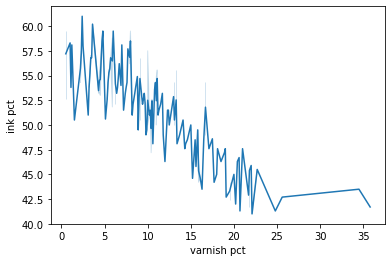

In [67]:
sns.lineplot(x='varnish pct', y='ink pct', data=train_df)


<AxesSubplot:xlabel='varnish pct', ylabel='solvent pct'>

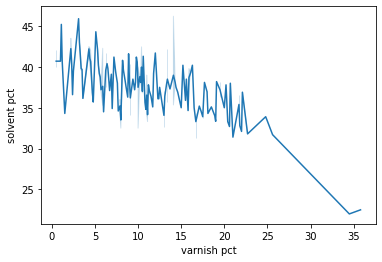

In [68]:
sns.lineplot(x='varnish pct', y='solvent pct', data=train_df)


### 模型计算之前，继续处理数据，将字符型的参数转换成离散数值。


In [69]:

encode = {
   'grain screened':{'yes':0,'no':1},
    # 'blade mfg':{'uddeholm':0,'benton':1},
    'paper type':{'coated':0,'uncoated':1,'super':2},
    'ink type':{'coated':0,'uncoated':1,'cover':2}, 
    # 'direct steam':{'yes':0,'no':1},
    # 'solvent type':{'naptha':0,'line':1,'xylol':2},
    'press type':{'motter70':0,'motter94':1,'albert70':2,'woodhoe70':3},
    'paper mill location':{'scandanavian':0,'canadian':1,'northus':2,'mideuropean':3,'southus':4},
    'press':{802.0:0,813.0:1,815.0:2,816.0:3,821.0:4,824.0:5,827.0:6,828.0:7}
    # 'press':{802.0:0,813.0:0,815.0:1,816.0:1,821.0:1,824.0:2,827.0:2,828.0:2}
}
train_df.replace(encode, inplace=True)


In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grain screened       539 non-null    int64  
 1   paper type           539 non-null    int64  
 2   ink type             539 non-null    int64  
 3   type on cylinder     539 non-null    object 
 4   press type           539 non-null    int64  
 5   press                539 non-null    int64  
 6   unit number          539 non-null    object 
 7   paper mill location  539 non-null    int64  
 8   proof cut            485 non-null    float64
 9   viscosity            534 non-null    float64
 10  caliper              512 non-null    float64
 11  ink temperature      537 non-null    float64
 12  humifity             538 non-null    float64
 13  roughness            509 non-null    float64
 14  blade pressure       476 non-null    float64
 15  varnish pct          271 non-null    flo

### 分类特征变量，转换成整数类型后，再次分析相关数据，用于分析如何填充数据。

In [71]:
train_df.corr()

,grain screened,paper type,ink type,press type,press,paper mill location,proof cut,viscosity,caliper,ink temperature,...,varnish pct,press speed,ink pct,solvent pct,wax,hardener,roller durometer,current density,anode space ratio,band type
grain screened,1.000000,-0.457721,-0.746039,0.074067,0.388418,-0.392458,-0.491242,0.023514,-0.089033,0.070350,...,-0.355880,0.501916,0.322316,0.153287,-0.274280,0.143603,-0.629515,0.120820,0.067573,-0.081356
paper type,-0.457721,1.000000,0.646404,-0.013731,-0.186599,0.458219,0.434074,-0.071116,0.067090,-0.003899,...,0.241558,-0.393091,-0.327454,-0.188757,0.177399,0.042645,0.593170,0.076501,0.019239,0.221176
ink type,-0.746039,0.646404,1.000000,0.024209,-0.321997,0.455157,0.432618,-0.038665,0.095878,-0.059857,...,0.344884,-0.441971,-0.280550,-0.115064,0.214316,-0.073504,0.601346,-0.073892,0.027938,0.240183
press type,0.074067,-0.013731,0.024209,1.000000,-0.339516,0.017756,0.001259,0.058774,-0.036581,0.015548,...,-0.067903,-0.014831,0.086401,-0.007429,0.299469,0.036621,-0.079482,0.014894,0.005301,0.214400
press,0.388418,-0.186599,-0.321997,-0.339516,1.000000,-0.233062,-0.212641,-0.061629,-0.013461,0.158174,...,-0.032952,0.542843,0.018696,0.111513,-0.368759,0.128176,-0.322980,0.083379,0.031382,-0.076262
paper mill location,-0.392458,0.458219,0.455157,0.017756,-0.233062,1.000000,0.235763,-0.103632,-0.007136,0.052061,...,0.201689,-0.349403,-0.214188,-0.081370,0.169186,-0.029189,0.389557,-0.008291,0.071222,0.213832
proof cut,-0.491242,0.434074,0.432618,0.001259,-0.212641,0.235763,1.000000,0.025808,0.074770,-0.004770,...,0.288356,-0.243688,-0.339885,-0.177735,0.147146,-0.093792,0.355372,-0.061757,-0.036471,0.044879
viscosity,0.023514,-0.071116,-0.038665,0.058774,-0.061629,-0.103632,0.025808,1.000000,0.194467,-0.058695,...,-0.032659,0.022521,-0.039447,0.032268,0.073574,-0.072593,-0.047575,-0.083220,-0.052105,0.075143
caliper,-0.089033,0.067090,0.095878,-0.036581,-0.013461,-0.007136,0.074770,0.194467,1.000000,-0.072452,...,0.134602,-0.084723,-0.063363,-0.064536,0.006243,-0.043287,0.083983,-0.156682,0.004180,-0.023028
ink temperature,0.070350,-0.003899,-0.059857,0.015548,0.158174,0.052061,-0.004770,-0.058695,-0.072452,1.000000,...,-0.024172,0.057820,-0.020601,0.034265,-0.073310,0.009432,-0.052235,0.071109,0.030228,0.046579


In [72]:
train_df.corr()[(train_df.corr() > 0.5) ]

,grain screened,paper type,ink type,press type,press,paper mill location,proof cut,viscosity,caliper,ink temperature,...,varnish pct,press speed,ink pct,solvent pct,wax,hardener,roller durometer,current density,anode space ratio,band type
grain screened,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.501916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paper type,NaN,1.000000,0.646404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.593170,NaN,NaN,NaN
ink type,NaN,0.646404,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.601346,NaN,NaN,NaN
press type,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
press,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.542843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paper mill location,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proof cut,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
viscosity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
caliper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ink temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
train_df.corr()[(train_df.corr()< -0.5) ]

,grain screened,paper type,ink type,press type,press,paper mill location,proof cut,viscosity,caliper,ink temperature,...,varnish pct,press speed,ink pct,solvent pct,wax,hardener,roller durometer,current density,anode space ratio,band type
grain screened,NaN,NaN,-0.746039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.629515,NaN,NaN,NaN
paper type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ink type,-0.746039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
press type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
press,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paper mill location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proof cut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
viscosity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
caliper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ink temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 可以看出，分类特征与数值型特征，与我们所挑选的特征press speed和roller durometer 相关度最大的有：
- grain creened —— roller durometer, -0.60
- ink type —— roller durometer, 0.536
- press   —— press speed,0.526

### grain screened的缺失值47个,ink type 无缺失值，roller durometer缺失值53个，press无缺失值，press speed缺失值10个。
下面选取roller durometer根据ink type 分类补充缺失值。其他少量缺失值的，还是采用平均值进行填充。

## 数据再次清洗

常见的缺失值补全方法：均值插补、同类均值插补、建模预测、高维映射、多重插补、极大似然估计、压缩感知和矩阵补全。
此处暂时先选择全部用均值填充。

#### 其他连续型数值，用平均值进行填充，以便进行后续的算法计算。

In [74]:
dfcolumns = train_df.columns.values.tolist()
# dfcolumns.remove("press speed")
dfcolumns.remove("roller durometer")
print(dfcolumns)

['grain screened', 'paper type', 'ink type', 'type on cylinder', 'press type', 'press', 'unit number', 'paper mill location', 'proof cut', 'viscosity', 'caliper', 'ink temperature', 'humifity', 'roughness', 'blade pressure', 'varnish pct', 'press speed', 'ink pct', 'solvent pct', 'wax', 'hardener', 'current density', 'anode space ratio', 'band type']


In [75]:
for item in dfcolumns:
    if train_df[item].dtype == 'float':
       train_df[item].fillna(train_df[item].mean(), inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grain screened       539 non-null    int64  
 1   paper type           539 non-null    int64  
 2   ink type             539 non-null    int64  
 3   type on cylinder     539 non-null    object 
 4   press type           539 non-null    int64  
 5   press                539 non-null    int64  
 6   unit number          539 non-null    object 
 7   paper mill location  539 non-null    int64  
 8   proof cut            539 non-null    float64
 9   viscosity            539 non-null    float64
 10  caliper              539 non-null    float64
 11  ink temperature      539 non-null    float64
 12  humifity             539 non-null    float64
 13  roughness            539 non-null    float64
 14  blade pressure       539 non-null    float64
 15  varnish pct          539 non-null    flo

#### roller durometer采用跟ink type的分类填充缺失值。

In [76]:
guess_roller = np.zeros(3)
guess_roller

array([0., 0., 0.])

In [77]:
train_df[["ink type","roller durometer"]].groupby("ink type",as_index=False).mean()

,ink type,roller durometer
0,0,32.294340
1,1,37.614634
2,2,39.800000


In [78]:
rollerdf = train_df[["ink type","roller durometer"]].groupby("ink type",as_index=False).mean()
print(rollerdf)
for i in range(3):
    guess_roller[i] = rollerdf.iloc[i,1]
guess_roller

   ink type  roller durometer
0         0         32.294340
1         1         37.614634
2         2         39.800000


array([32.29433962, 37.61463415, 39.8       ])

In [79]:
pd.set_option('mode.chained_assignment',None)

for i in range(3):
    mask = train_df[train_df["roller durometer"].isnull() & (train_df["ink type"] == i) ]
    if mask.empty:
        continue
    train_df.loc[mask.index, "roller durometer"] = guess_roller[i]

mask.index
    

Int64Index([512, 513, 518], dtype='int64')

In [80]:
train_df["roller durometer"]

0      34.000000
1      34.000000
2      40.000000
3      40.000000
4      35.000000
         ...    
536    37.614634
537    32.294340
538    32.294340
539    37.614634
540    37.614634
Name: roller durometer, Length: 539, dtype: float64

### 下面是把关联分析中最大的press speed特征量离散化，另外选取了变化曲线有明细趋势的proof cut，分别用cut和qcut方法离散化。

<AxesSubplot:xlabel='press speed', ylabel='band type'>

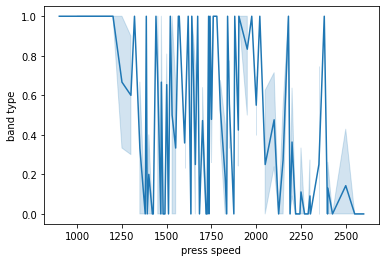

In [81]:
sns.lineplot(x='press speed', y='band type', data=train_df)

In [82]:
# train_df.drop(['speedBand'], axis=1, inplace=True)
train_df['speedBand'] = pd.qcut(train_df['press speed'],[0, 0.25, 0.5, 0.75, 1],labels=[0,1,2,3])
train_df[['speedBand', 'band type']].groupby(['speedBand'], as_index=False).mean().sort_values(by='speedBand', ascending=True)

,speedBand,band type
0,0,0.452703
1,1,0.510638
2,2,0.500000
3,3,0.223881


<AxesSubplot:xlabel='proof cut', ylabel='band type'>

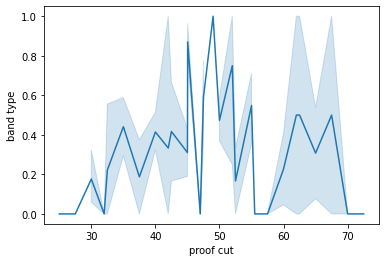

In [83]:
sns.lineplot(x='proof cut', y='band type', data=train_df)

In [84]:
train_df['cutBand'] = pd.cut(train_df['proof cut'],bins=[0,45,55,100],labels=[0, 1, 2])
train_df[['cutBand', 'band type']].groupby(['cutBand'], as_index=False).mean().sort_values(by='cutBand', ascending=True)

,cutBand,band type
0,0,0.340426
1,1,0.586207
2,2,0.222222


In [83]:
train_df.head()


,grain screened,paper type,ink type,type on cylinder,press type,press,unit number,paper mill location,proof cut,viscosity,...,ink pct,solvent pct,wax,hardener,roller durometer,current density,anode space ratio,band type,speedBand,cutBand
0,0,1,1,yes,1,4,2,2,55.0,46.0,...,50.5,36.4,2.5,1.0,34.0,40.0,105.00,1,1,1
1,0,1,1,yes,1,4,2,2,55.0,46.0,...,54.9,38.5,2.5,0.7,34.0,40.0,105.00,0,2,1
2,0,1,0,yes,3,2,9,2,62.0,40.0,...,53.8,39.8,2.8,0.9,40.0,40.0,103.87,0,2,2
3,0,1,1,yes,3,3,9,2,52.0,40.0,...,55.6,38.8,2.5,1.3,40.0,40.0,108.06,0,0,1
4,1,1,0,yes,3,3,2,2,50.0,46.0,...,57.5,42.5,2.3,0.6,35.0,40.0,106.67,0,3,1


In [88]:
# 输出清洗后数据lab03_bands.csv
# train_df.to_csv("lab03_bands.csv")

## Lab03决策树II实验，建模、预测和评价



In [84]:
# X = train_df[['grain screened','blade mfg','paper type','ink type','direct steam','press type']]
X = train_df[['paper type','ink type','press type','speedBand','cutBand']]
y = train_df['band type']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
cat_tree = DecisionTreeClassifier(criterion='entropy')
cat_tree.fit(x_train, y_train)
y_pred = cat_tree.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7160493827160493


### 评价

将样本分成3部分，训练、验证、预测。因为只有一个样本库，按60%、20%、20%划分。

In [85]:
X = train_df[['grain screened','paper type','ink type','press type','speedBand','cutBand']]
y = train_df['band type']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)


In [86]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_tree.fit(X_train, y_train)
y_pred = entropy_tree.predict(X_valid)
print("Accuracy:", metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.7407407407407407


In [87]:
print(metrics.confusion_matrix(y_valid, y_pred))

[[39  4]
 [17 21]]


In [88]:
print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        43
           1       0.84      0.55      0.67        38

    accuracy                           0.74        81
   macro avg       0.77      0.73      0.73        81
weighted avg       0.76      0.74      0.73        81



[Text(250.4803097747093, 209.6742857142857, 'X[1] <= 1.5\nentropy = 0.983\nsamples = 377\nvalue = [217, 160]'),
 Text(246.58728651889535, 194.14285714285714, 'X[4] <= 2.5\nentropy = 0.967\nsamples = 358\nvalue = [217, 141]'),
 Text(177.83968931686047, 178.61142857142858, 'X[5] <= 1.5\nentropy = 0.996\nsamples = 274\nvalue = [147, 127]'),
 Text(89.00728561046512, 163.07999999999998, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 236\nvalue = [117, 119]'),
 Text(19.46511627906977, 147.54857142857142, 'X[5] <= 0.5\nentropy = 0.784\nsamples = 30\nvalue = [23, 7]'),
 Text(15.572093023255814, 132.01714285714286, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(23.35813953488372, 132.01714285714286, 'X[4] <= 1.5\nentropy = 0.934\nsamples = 20\nvalue = [13, 7]'),
 Text(19.46511627906977, 116.48571428571428, 'X[2] <= 0.5\nentropy = 0.964\nsamples = 18\nvalue = [11, 7]'),
 Text(11.67906976744186, 100.9542857142857, 'X[0] <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(7.7860465116279

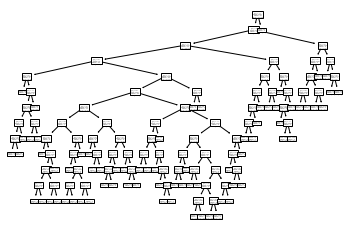

In [89]:
from sklearn import metrics, tree
tree.plot_tree(entropy_tree)

In [90]:
# ['entropy', '8']
entropy_tree_lim_eight = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
entropy_tree_lim_eight.fit(X_train, y_train)
y_pred = entropy_tree_lim_eight.predict(X_valid)

print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        43
           1       0.85      0.76      0.81        38

    accuracy                           0.83        81
   macro avg       0.83      0.82      0.82        81
weighted avg       0.83      0.83      0.83        81



In [91]:
# ['entropy', '5']
entropy_tree_ent_five = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
entropy_tree_ent_five.fit(X_train, y_train)
y_pred = entropy_tree_ent_five.predict(X_valid)

print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.58      0.68        43
           1       0.64      0.84      0.73        38

    accuracy                           0.70        81
   macro avg       0.72      0.71      0.70        81
weighted avg       0.73      0.70      0.70        81



In [92]:
# ['entropy', '7']
entropy_tree_ent_seven = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)
entropy_tree_ent_seven.fit(X_train, y_train)
y_pred = entropy_tree_ent_seven.predict(X_valid)

print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.86      0.79      0.82        38

    accuracy                           0.84        81
   macro avg       0.84      0.84      0.84        81
weighted avg       0.84      0.84      0.84        81



In [93]:
# ['entropy', '12']
entropy_tree_ent_twelve = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)
entropy_tree_ent_twelve.fit(X_train, y_train)
y_pred = entropy_tree_ent_twelve.predict(X_valid)

print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81        43
           1       0.86      0.63      0.73        38

    accuracy                           0.78        81
   macro avg       0.80      0.77      0.77        81
weighted avg       0.79      0.78      0.77        81



In [94]:
# ['gini', '5']
entropy_tree_gini_five = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
entropy_tree_gini_five.fit(X_train, y_train)
y_pred = entropy_tree_gini_five.predict(X_valid)

print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83        43
           1       0.96      0.58      0.72        38

    accuracy                           0.79        81
   macro avg       0.84      0.78      0.78        81
weighted avg       0.83      0.79      0.78        81



In [95]:
# ['gini', '7']
entropy_tree_gini_seven = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42)
entropy_tree_gini_seven.fit(X_train, y_train)
y_pred = entropy_tree_gini_seven.predict(X_valid)

print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        43
           1       0.74      0.76      0.75        38

    accuracy                           0.77        81
   macro avg       0.76      0.77      0.76        81
weighted avg       0.77      0.77      0.77        81



In [96]:
# ['gini', '8']
entropy_tree_gini_eight = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=42)
entropy_tree_gini_eight.fit(X_train, y_train)
y_pred = entropy_tree_gini_eight.predict(X_valid)

print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        43
           1       0.90      0.68      0.78        38

    accuracy                           0.81        81
   macro avg       0.83      0.81      0.81        81
weighted avg       0.83      0.81      0.81        81



In [97]:
# ['gini', '12']
entropy_tree_gini_twelve = DecisionTreeClassifier(criterion='gini', max_depth=12, random_state=42)
entropy_tree_gini_twelve.fit(X_train, y_train)
y_pred = entropy_tree_gini_twelve.predict(X_valid)

print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80        43
           1       0.85      0.61      0.71        38

    accuracy                           0.77        81
   macro avg       0.79      0.76      0.76        81
weighted avg       0.78      0.77      0.76        81



#### 通过上面的调整两个不同的参数值，entropy或gini，不同深度值，最终筛选出相对最佳的组合，作为最终选定的模型，并进行后面的预测。

In [98]:
y_pred =  entropy_tree_gini_eight.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        52
           1       0.53      0.55      0.54        29

    accuracy                           0.67        81
   macro avg       0.64      0.64      0.64        81
weighted avg       0.67      0.67      0.67        81



# 第二部分 Lab 04 - K-Nearest Neighbours，KNN近邻分类算法


## 1、导入库

In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

## 2、获得数据

In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   grain screened       539 non-null    int64   
 1   paper type           539 non-null    int64   
 2   ink type             539 non-null    int64   
 3   type on cylinder     539 non-null    object  
 4   press type           539 non-null    int64   
 5   press                539 non-null    int64   
 6   unit number          539 non-null    object  
 7   paper mill location  539 non-null    int64   
 8   proof cut            539 non-null    float64 
 9   viscosity            539 non-null    float64 
 10  caliper              539 non-null    float64 
 11  ink temperature      539 non-null    float64 
 12  humifity             539 non-null    float64 
 13  roughness            539 non-null    float64 
 14  blade pressure       539 non-null    float64 
 15  varnish pct          53

In [101]:
train_df.head()

,grain screened,paper type,ink type,type on cylinder,press type,press,unit number,paper mill location,proof cut,viscosity,...,ink pct,solvent pct,wax,hardener,roller durometer,current density,anode space ratio,band type,speedBand,cutBand
0,0,1,1,yes,1,4,2,2,55.0,46.0,...,50.5,36.4,2.5,1.0,34.0,40.0,105.00,1,1,1
1,0,1,1,yes,1,4,2,2,55.0,46.0,...,54.9,38.5,2.5,0.7,34.0,40.0,105.00,0,2,1
2,0,1,0,yes,3,2,9,2,62.0,40.0,...,53.8,39.8,2.8,0.9,40.0,40.0,103.87,0,2,2
3,0,1,1,yes,3,3,9,2,52.0,40.0,...,55.6,38.8,2.5,1.3,40.0,40.0,108.06,0,0,1
4,1,1,0,yes,3,3,2,2,50.0,46.0,...,57.5,42.5,2.3,0.6,35.0,40.0,106.67,0,3,1


In [102]:
target = train_df['band type']

In [159]:
# data = train_df[["press speed","roller durometer","ink pct","current density","humifity","varnish pct","solvent pct"]]
data = train_df[["press speed","roller durometer","ink pct","humifity","viscosity","proof cut"]]
data.head()

,press speed,roller durometer,ink pct,humifity,viscosity,proof cut
0,1700.0,34.0,50.5,78.0,46.0,55.0
1,1900.0,34.0,54.9,80.0,46.0,55.0
2,1850.0,40.0,53.8,80.0,40.0,62.0
3,1467.0,40.0,55.6,75.0,40.0,52.0
4,2100.0,35.0,57.5,80.0,46.0,50.0


## 3、分析数据，可视化数据

[Text(35.0, 0, ''),
 Text(40.0, 0, ''),
 Text(45.0, 0, ''),
 Text(50.0, 0, ''),
 Text(55.0, 0, ''),
 Text(60.0, 0, ''),
 Text(65.0, 0, ''),
 Text(70.0, 0, ''),
 Text(75.0, 0, ''),
 Text(80.0, 0, '')]

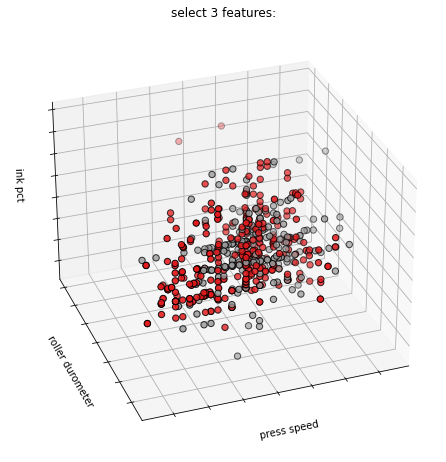

In [160]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110) 
ax.scatter(data["press speed"], data["roller durometer"], data["ink pct"], c=target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("select 3 features:")
ax.set_xlabel("press speed")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("roller durometer")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("ink pct")
ax.w_zaxis.set_ticklabels([])

KeyError: 'current density'

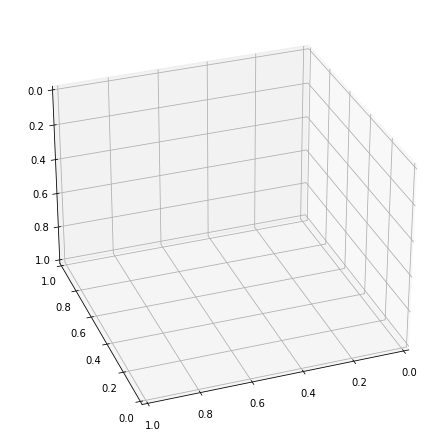

In [161]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110) 
ax.scatter(data["ink pct"], data["current density"], data["humifity"], c=target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("select 3 features:")
ax.set_xlabel("ink pct")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("current density")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("humifity")
ax.w_zaxis.set_ticklabels([])

## 4、数据预处理

In [162]:
data.describe()

,press speed,roller durometer,ink pct,humifity,viscosity,proof cut
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,1826.812500,34.815248,55.638533,78.539033,50.949438,45.036082
std,315.987355,4.367518,5.269475,7.727429,8.021305,8.578212
min,900.000000,28.000000,41.000000,57.000000,35.000000,25.000000
25%,1600.000000,30.000000,52.600000,73.000000,43.000000,40.000000
50%,1800.000000,34.000000,55.638533,78.000000,50.000000,45.000000
75%,2000.000000,39.800000,58.800000,82.000000,56.000000,50.000000
max,2600.000000,60.000000,76.900000,105.000000,72.000000,72.500000


### 在训练模型之前，我们先标准化数据。使用MinMaxScaler函数。

In [163]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
data_scaled.describe()

,press speed,roller durometer,ink pct,humifity,viscosity,proof cut
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,0.545184,0.212977,0.407759,0.448730,0.431066,0.421812
std,0.185875,0.136485,0.146782,0.160988,0.216792,0.180594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.411765,0.062500,0.323120,0.333333,0.216216,0.315789
50%,0.529412,0.187500,0.407759,0.437500,0.405405,0.421053
75%,0.647059,0.368750,0.495822,0.520833,0.567568,0.526316
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 把所有的数据，分成两部分，70%作为训练数据，30%作为验证数据。

In [164]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.3)

## 5、训练模型

我们用这些数据训练KNN算法，并作出预测。用Scikit-learn中的sklearn.neighbors库。

In [165]:
fivenn = KNeighborsClassifier(n_neighbors=5)
fivenn.fit(X_train, y_train)

pred = fivenn.predict(X_test)

default_acc = metrics.accuracy_score(y_test, pred)

print("Accuracy for model k=5:", default_acc)

Accuracy for model k=5: 0.6296296296296297


## 6、评价模型

### 比较曼哈顿距离和欧式距离的结果
- 
#### 距离可选项：
- p=1，设置为曼和顿距离
- p=2，设置为欧式距离
#### 权重选项weights，设置uniform和distance进行对比，此处先用uniform。
- uniform是指不管距离大小，权重都一样
- distance，距离越近，权重越大

#### 此处先采用参数p=1，曼和顿距离，权重缺省值uniform。比较不同的k值的精确度曲线。

In [166]:
manhattanNN = KNeighborsClassifier(n_neighbors=5, p=1,weights="uniform")
manhattanNN.fit(X_train, y_train)
pred = manhattanNN.predict(X_test)

manhattan_acc = metrics.accuracy_score(y_test, pred)
print("Accuracy for model k=5, p=1:", manhattan_acc)

Accuracy for model k=5, p=1: 0.6172839506172839


#### K 值的选择

看K值变化影响准确度的变化趋势。K取值从1到60。

In [167]:
accuracy = []
# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=1,weights="uniform")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))



Text(0, 0.5, 'Accuracy')

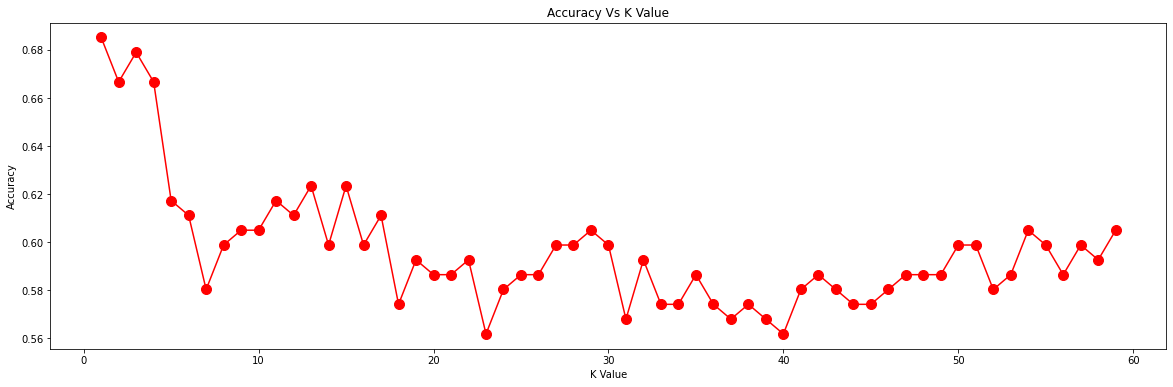

In [168]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

#### p=1，曼哈顿距离，weights 设置为distance。

In [113]:
accuracy = []
# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=1,weights="distance")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))



Text(0, 0.5, 'Accuracy')

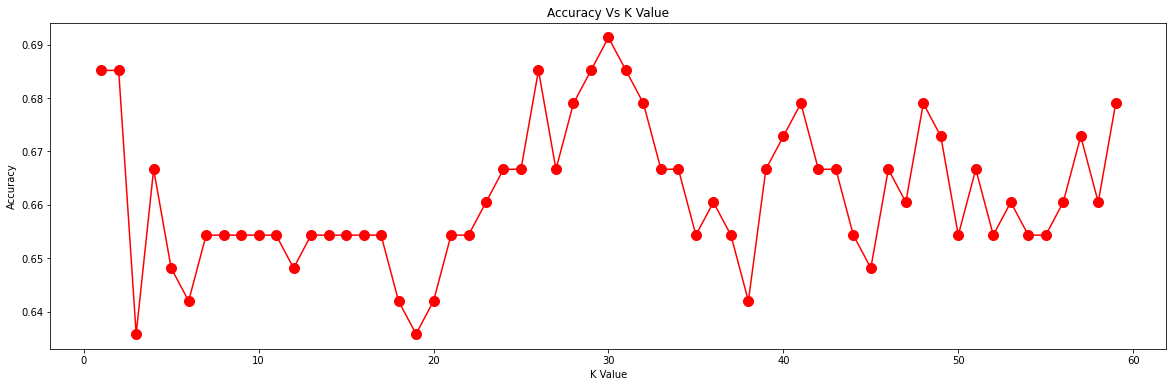

In [114]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

#### 采用参数p=2，欧式距离。weights分别设置为uniform和distance。画出不同k值的精度曲线

In [115]:
euclideanNN = KNeighborsClassifier(n_neighbors=5, p=2,weights="uniform")
euclideanNN.fit(X_train, y_train)
pred = euclideanNN.predict(X_test)

euclidean_acc = metrics.accuracy_score(y_test, pred)
print("Accuracy for model k=5, p=2:", euclidean_acc)

Accuracy for model k=5, p=2: 0.6358024691358025


In [116]:
accuracy = []

# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,weights="uniform")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))



Text(0, 0.5, 'Accuracy')

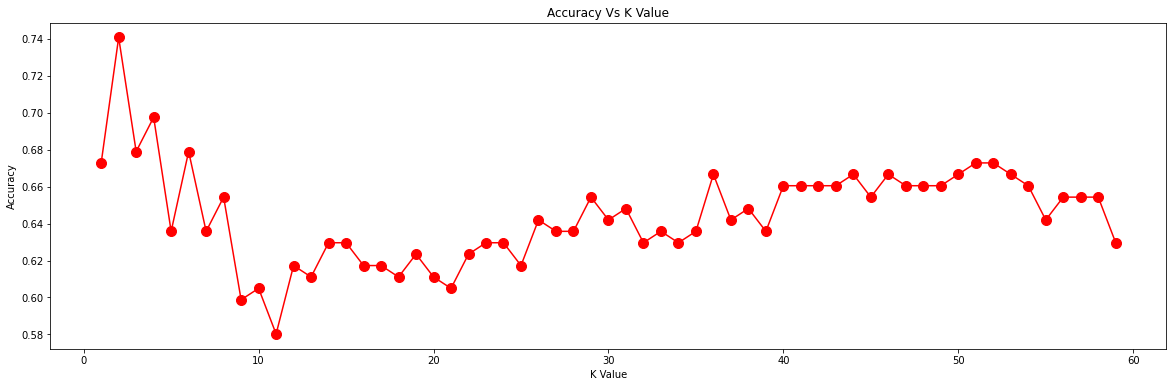

In [117]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [118]:
euclideanNN = KNeighborsClassifier(n_neighbors=5, p=2,weights="distance")
euclideanNN.fit(X_train, y_train)
pred = euclideanNN.predict(X_test)

euclidean_acc = metrics.accuracy_score(y_test, pred)
print("Accuracy for model k=5, p=2:", euclidean_acc)

Accuracy for model k=5, p=2: 0.654320987654321


In [119]:
accuracy = []

# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,weights="distance")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))



Text(0, 0.5, 'Accuracy')

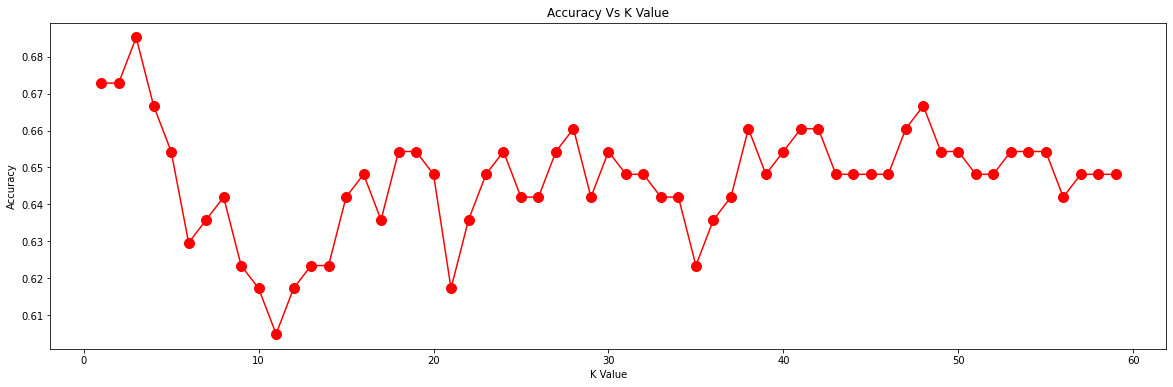

In [120]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

## 对比：把所有的数据，分成两部分，50%作为训练数据，50%作为验证数据。

In [121]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.8)

In [122]:
fivenn = KNeighborsClassifier(n_neighbors=5)

In [123]:
fivenn.fit(X_train, y_train)

KNeighborsClassifier()

In [124]:
pred = fivenn.predict(X_test)

default_acc = metrics.accuracy_score(y_test, pred)

print("Accuracy for model k=5:", default_acc)

Accuracy for model k=5: 0.6203703703703703


## 比较曼哈顿距离和欧式距离的结果

#### 采用参数p=1，曼和顿距离。比较不同的k值的精确度曲线。

In [125]:
manhattanNN = KNeighborsClassifier(n_neighbors=5, p=1)
manhattanNN.fit(X_train, y_train)
pred = manhattanNN.predict(X_test)

manhattan_acc = metrics.accuracy_score(y_test, pred)
print("Accuracy for model k=5, p=1:", manhattan_acc)

Accuracy for model k=5, p=1: 0.6296296296296297


In [126]:
accuracy = []
# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))



Text(0, 0.5, 'Accuracy')

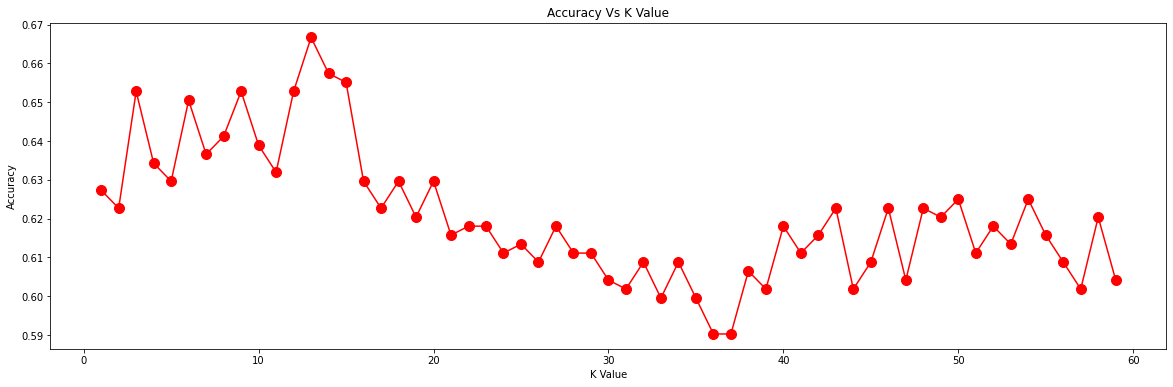

In [127]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

#### 采用参数p=2，欧式距离。画出不同k值的精度曲线

In [128]:
euclideanNN = KNeighborsClassifier(n_neighbors=20, p=2)
euclideanNN.fit(X_train, y_train)
pred = euclideanNN.predict(X_test)

euclidean_acc = metrics.accuracy_score(y_test, pred)
print("Accuracy for model k=5, p=2:", euclidean_acc)

Accuracy for model k=5, p=2: 0.6157407407407407


In [129]:
accuracy = []

# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i,p=2)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))



Text(0, 0.5, 'Accuracy')

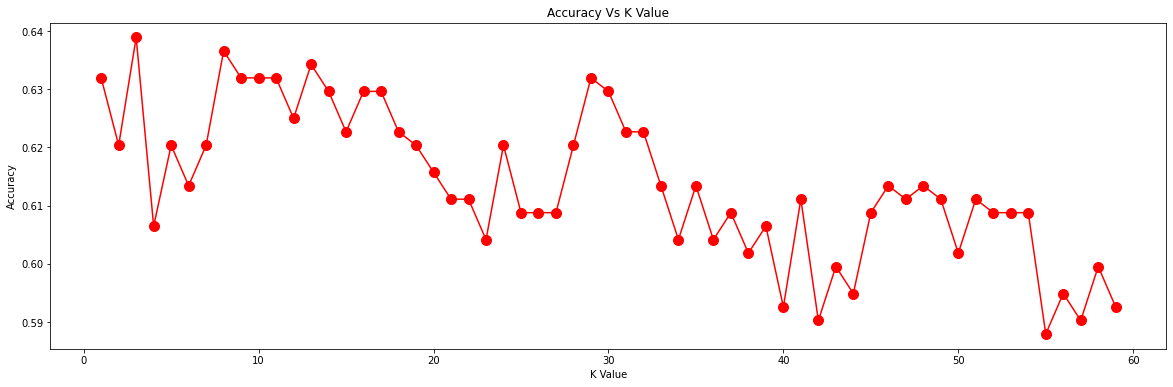

In [130]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

# Lab05 - 特征挑选

## 1、引入机器学习算法包

In [138]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

## 2、设定目标值，准备和清洗数据

In [139]:
target = train_df['band type']



lab5_df = train_df.drop(['grain screened','band type','paper type','ink type','type on cylinder',
                         'press type','press','unit number','paper mill location',
                        'speedBand','cutBand'],axis=1)

In [140]:
num_encode = {
    'band type': {'noband':0, "band":1},
}
lab5_df.replace(num_encode,inplace=True)


In [141]:
lab5_df

,proof cut,viscosity,caliper,ink temperature,humifity,roughness,blade pressure,varnish pct,press speed,ink pct,solvent pct,wax,hardener,roller durometer,current density,anode space ratio
0,55.000000,46.000000,0.200000,17.0,78.0,0.750000,20.0,13.100000,1700.0,50.500000,36.400000,2.500000,1.000000,34.000000,40.0,105.00
1,55.000000,46.000000,0.300000,15.0,80.0,0.750000,20.0,6.600000,1900.0,54.900000,38.500000,2.500000,0.700000,34.000000,40.0,105.00
2,62.000000,40.000000,0.433000,16.0,80.0,0.724333,30.0,6.500000,1850.0,53.800000,39.800000,2.800000,0.900000,40.000000,40.0,103.87
3,52.000000,40.000000,0.300000,16.0,75.0,0.312500,30.0,5.600000,1467.0,55.600000,38.800000,2.500000,1.300000,40.000000,40.0,108.06
4,50.000000,46.000000,0.300000,17.0,80.0,0.750000,30.0,10.323985,2100.0,57.500000,42.500000,2.300000,0.600000,35.000000,40.0,106.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,45.036082,52.000000,0.275857,18.0,82.0,1.000000,25.0,10.323985,1880.0,55.638533,38.567645,1.000000,1.000000,37.614634,40.0,112.50
537,45.036082,50.949438,0.200000,16.1,76.0,0.500000,34.0,10.323985,2100.0,55.638533,38.567645,2.437524,1.002672,32.294340,40.0,110.00
538,45.036082,50.949438,0.300000,16.5,70.0,1.000000,34.0,10.323985,1903.0,55.638533,38.567645,2.700000,2.800000,32.294340,40.0,108.00
539,45.036082,46.000000,0.267000,16.4,76.0,1.000000,34.0,10.323985,1903.0,55.638533,38.567645,1.500000,2.300000,37.614634,40.0,108.00


## 3、特征挑选

### 1）单变量选择

In [142]:
best_features = SelectKBest(score_func=chi2, k=10).fit(lab5_df, target)

dfscores = pd.DataFrame(best_features.scores_)
dfcolumns = pd.DataFrame(lab5_df.columns)

# concat two dataframes for better visualization 
# 合并两个数据集以获得更好的可视化效果
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns 命名数据集列

print(featureScores.nlargest(10,'Score'))

               Specs        Score
8        press speed  1202.800925
13  roller durometer     5.412689
4           humifity     5.065530
1          viscosity     3.786953
9            ink pct     3.261766
0          proof cut     1.525254
14   current density     0.966424
7        varnish pct     0.831391
12          hardener     0.711349
10       solvent pct     0.335517


### 2）基于树的特征选择

press speed         0.089095
roller durometer    0.076351
proof cut           0.072031
varnish pct         0.071209
ink pct             0.068796
viscosity           0.066397
solvent pct         0.063280
ink temperature     0.062417
humifity            0.060271
hardener            0.059303
dtype: float64

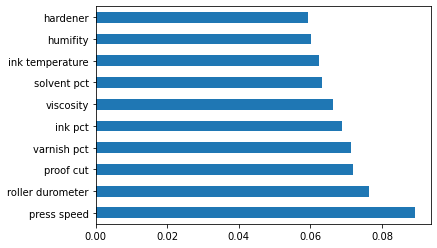

In [143]:
tree = ExtraTreesClassifier()
tree.fit(lab5_df, target)

df_feature_importances = pd.Series(tree.feature_importances_, index=lab5_df.columns)
df_feature_importances.nlargest(10).plot(kind='barh')
df_feature_importances.nlargest(10)

### 3）使用相关矩阵

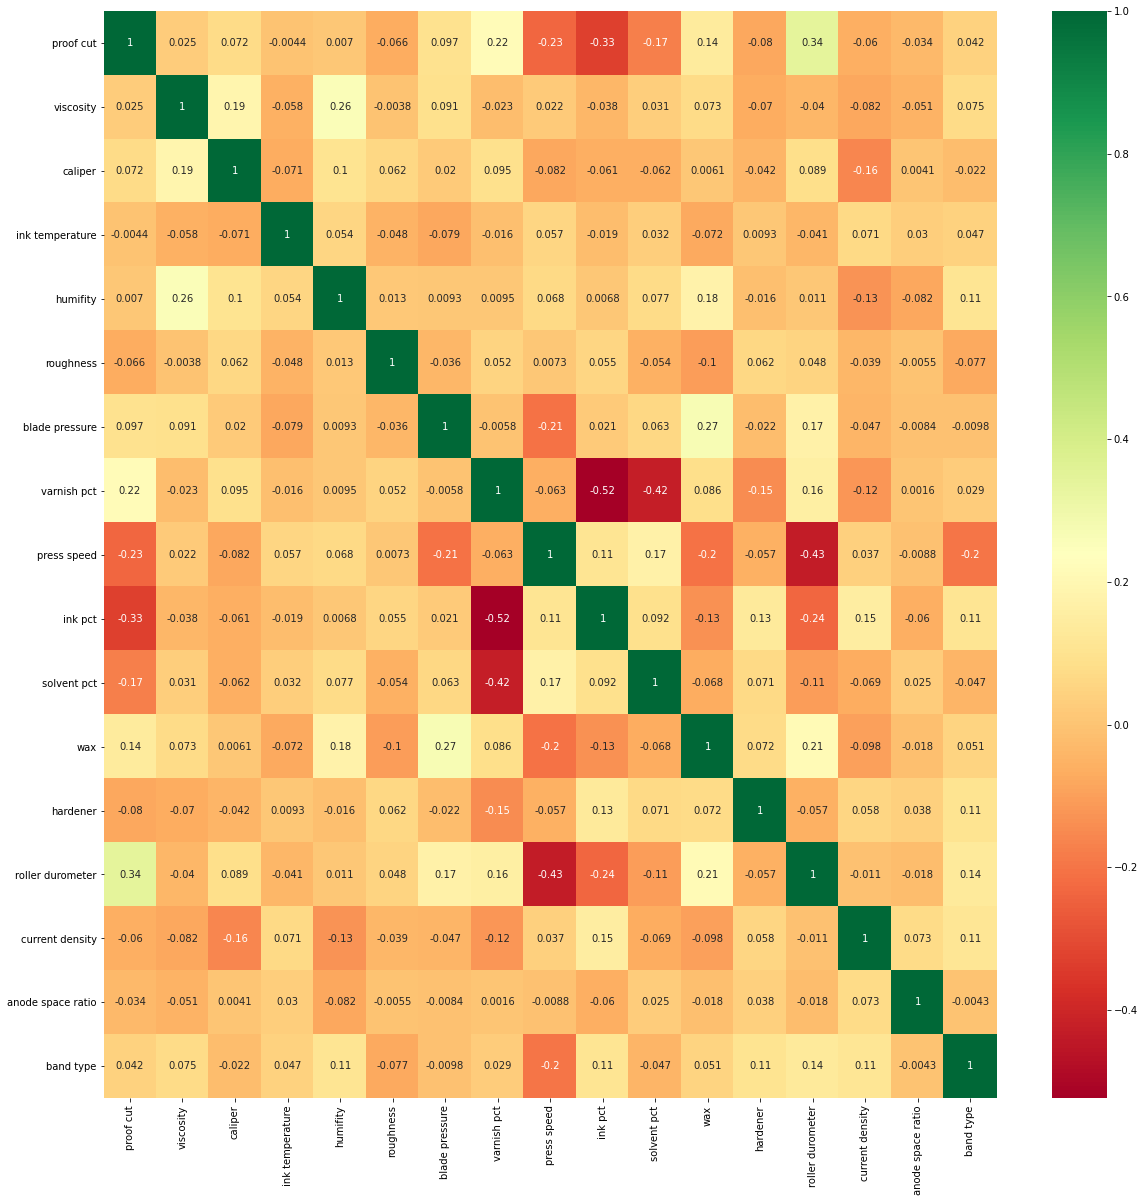

In [137]:
combine = pd.concat([lab5_df, target], axis=1)
corr_mat = combine.corr()


plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

## 4、再次训练KNN模型和模型评价